<a href="https://colab.research.google.com/github/AlinaMidhath/DL-projects/blob/main/Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification Using Deep Learning(neural Network)**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)#the purpose of setting the seed is while fitting the data to the NN few random values are generated and each time you train the model these values cause minor cange in the accuracy or in the reseaarch , to avoid these changes we use thin set seed
from tensorflow import keras
from keras.datasets import mnist
#we have the mnist data in keras itself like we have for eg breast cancer data in sklearn
from tensorflow.math import confusion_matrix

Load the MNIST data from keras

In [39]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()

In [40]:
type(X_train)

numpy.ndarray

In [41]:
#shape of the numpy arrays
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


these are grayscale images

the shape defines that x_train contains 60000 images and their dimensions are 28*28

the y_train contains the labels for x_train and same is the case foer y_test

training data --> 60000 images

testing data --> 10000 images


image dimensions 28 x 28

Grayscale Image--< 1 channel

In [42]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [43]:
print(X_train[10].shape)

(28, 28)


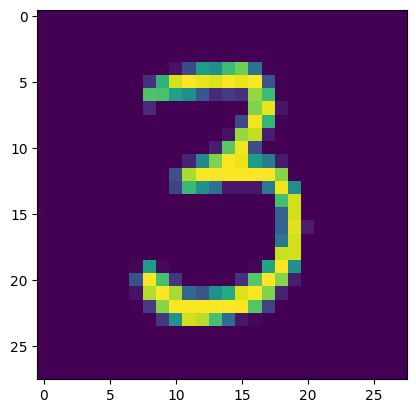

3


In [44]:
#displaying the image

plt.imshow(X_train[50])
plt.show()

#print the corresponding label
print(y_train[50])

Image Labels

In [45]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [46]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We cn use this labels as such or we can also apply one hot Encoding

eg if label is 0 then encoding gives 1 0 0 0 0 0 0 0 0 0

if label is 2 then encoding gives 0 0 1 0 0 0 0 0 0 0


we dont need to resize bcz all the immages have same dimensions in this dataset

In [47]:
#scaling the values that is we know the intensity is defined in the range of o to 255 but  scaling changes it to 0 to 1 so that it becomes easy for NN
#scaling does not change the information but makes it simpler for NN to understand the data
X_train =X_train/255
X_test = X_test/255
#0/255 = 0(min value)
# 255/255 = 1 (max vlaue)

In [48]:
#printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Here we can see all the values are changed to be in between 0 and 1


**Building a Neural Network**

Here we are using the basic neural network not cnn


CNN is widely used for image recognition and

RNN is used for text and audio recognition

In [49]:
#Setting the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #we can not feed the data to the model in the form of matrix(2d) or any form of array,the dat should be one dimensional, so flatten loads all the values in a single line
    keras.layers.Dense(50, activation ='relu'),#here 50 is the no of neurons we want
    keras.layers.Dense(50, activation ='relu'),#relu define the activation function
    keras.layers.Dense(10, activation ='sigmoid'),# here 10 is the no . of values in the label
])

In [50]:
#compiling the neural network
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics =['accuracy'])

In [51]:
#training the NN
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2987 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

Trainig data accuracy = 98.9

**Accuracy on Test data:**

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9724
0.9724000096321106


Trainig data accuracy = 97.1

In [53]:
print(X_test.shape)

(10000, 28, 28)


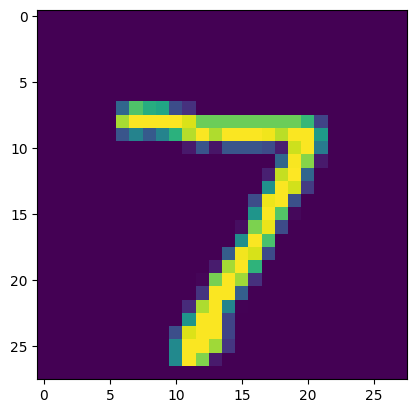

In [54]:
#first data point in x_test
plt.imshow(X_test[0])
plt.show()

In [55]:
print(y_test[0])

7


In y_pred we are storing the predicted values of X_test

In [56]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [57]:
print(y_pred.shape)

(10000, 10)


Here we are predicting the value using the nn model

model.predict() gives the prediction probabilities of each class( 0 to 9) for that data point

In [58]:
print(y_pred[0])

[6.90817658e-04 2.07402802e-04 1.12073280e-01 5.40641248e-01
 1.03573585e-08 5.15898049e-01 8.05978306e-09 9.99993443e-01
 3.44406337e-01 5.72827309e-02]


In above output we see the probability of y_pred[0] of being a digit from the given labels that is from 0 to 9

here we see the maximum probability is of label--> 7 that is there is the highest chance of y_pred[0] to be 7


In [59]:
#converting the prediction probabilities to class labels
label_firstimg = np.argmax(y_pred[0])
print(label_firstimg)
#here np.argmax checks for the maximum value(of prediction) in y_pred[0] and prints its label

7


In [60]:
#converting the prediction probabilities to class labels for all data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 1, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 9, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [61]:
print(y_pred)

[[6.9081766e-04 2.0740280e-04 1.1207328e-01 ... 9.9999344e-01
  3.4440634e-01 5.7282731e-02]
 [1.1523883e-01 6.1874217e-01 9.9999982e-01 ... 3.3872880e-08
  2.0785755e-03 6.6573286e-10]
 [1.5196372e-03 9.9974549e-01 3.2291102e-01 ... 8.2189882e-01
  3.8273856e-01 2.2707398e-03]
 ...
 [2.7083650e-12 5.8386040e-06 1.2318849e-08 ... 9.9873221e-01
  6.6334796e-03 9.9833596e-01]
 [5.6266778e-09 4.9680058e-04 6.0220429e-09 ... 1.3503693e-02
  8.0432999e-01 8.2205434e-06]
 [7.2487366e-01 1.9335306e-05 8.3344430e-06 ... 6.0943222e-07
  3.4796447e-02 1.9588583e-04]]


ABove we can clearly spot the difference between y_pred and y_pred_labels

y_test --> true labels
y_pred_labels --> predicted labels

Confusion Matrix

In [62]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [63]:
print(conf_mat)

tf.Tensor(
[[ 965    0    0    3    1    4    3    1    3    0]
 [   0 1127    2    2    0    1    2    1    0    0]
 [   5    4  995   13    2    0    4    6    3    0]
 [   0    1    4  987    0    6    0    4    1    7]
 [   0    0    5    1  952    1    3    4    0   16]
 [   1    0    0   14    1  867    3    0    2    4]
 [   2    2    0    1    9   15  927    0    2    0]
 [   0    3   11    6    1    1    0  994    4    8]
 [   3    1    4    8    6   11    2    4  924   11]
 [   1    2    0    7    7    4    1    3    0  984]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

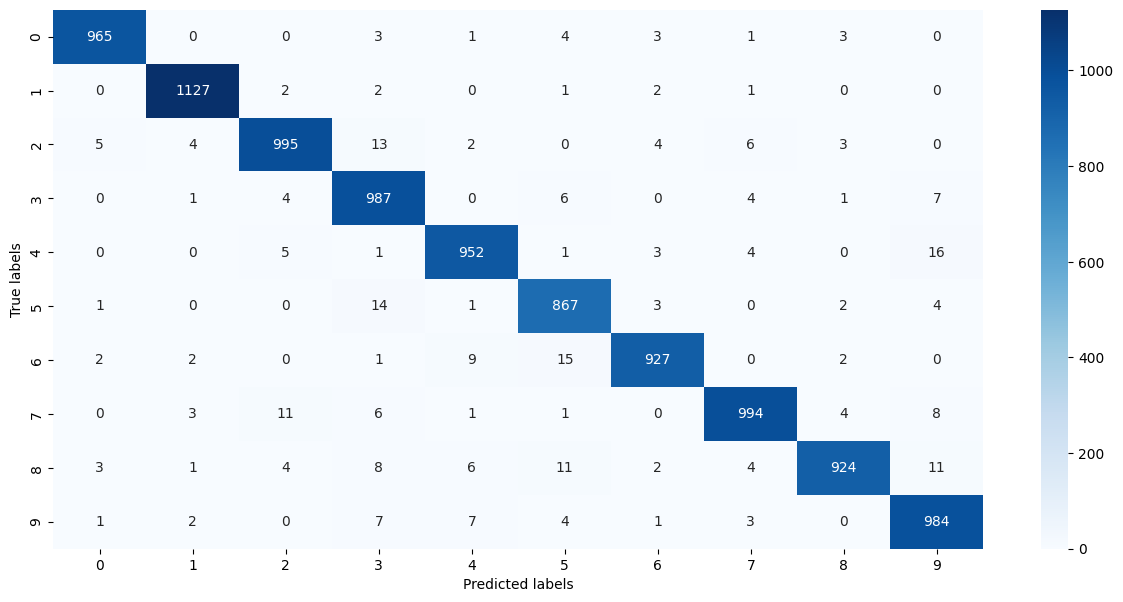

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot =True, fmt='d', cmap='Blues')
plt.ylabel("True labels")
plt.xlabel("Predicted labels")

the heatmap shows that 965 images of 0 were predicted correctly and 1 image of 0 was predicted to be 4 and 3 images of 0 were predicted to be 6

11 images of 8 were predicted to be 5

Building the Predictive System

In [90]:
input_image_path ='/content/mnist7.png'
input_image =cv2.imread(input_image_path)

In [91]:
type(input_image)

numpy.ndarray

In [92]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


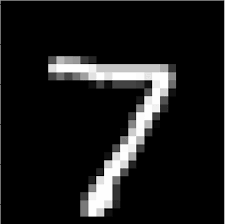

In [93]:
cv2_imshow(input_image)

In [94]:
input_image.shape

(224, 225, 3)

This image is taken as an RGB image

and the dimension is 227x227

but we have trained our model for a grayscale image odf 28x28 dimension so we will convert this image to be predicted in to grayscale and of dimension 28x28

In [95]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [96]:
grayscale.shape

(224, 225)

In [97]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [98]:
input_image_resize.shape

(28, 28)

In [99]:
cv2_imshow(input_image_resize)

In [100]:
#scaling
input_image_resize = input_image_resize/255

In [101]:
type(input_image_resize)

numpy.ndarray

In [102]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])# tell the nn that we are giving it only one image whose dimension is 28x28  to predict

In [103]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 35ms/step
[[6.75863237e-04 2.05076110e-04 1.10218234e-01 5.41776478e-01
  1.07377049e-08 5.10342717e-01 8.02031064e-09 9.99993563e-01
  3.47692907e-01 5.89377433e-02]]


In [104]:
input_pred_label = np.argmax(input_pred)

In [105]:
print(input_pred_label)

7


There fore it predicted correctly

**Predictive System**

Path of the image to be predicted: /content/mnist7.png


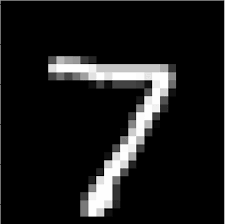

1/1 [==============================] - 0s 25ms/step
The Handwritten digit is:  7


In [117]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print("The Handwritten digit is: ", input_pred_label)